In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import sys
import tempfile

from sklearn import svm, metrics
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import requests
from requests.auth import HTTPBasicAuth
from random import randint,random
import json

Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
AMBASSADOR_API_IP="localhost:8002"

def rest_request(deploymentName,request):
    payload = {'json': json.dumps(request)}
    response = requests.post(
                "http://"+AMBASSADOR_API_IP+"/seldon/"+deploymentName+"/api/v0.1/predictions",
                #"http://localhost:8009/predict",
                #"http://localhost:5300/predict",
                json=request)
                #data=payload)
    print(response)
    return response.json()   
    
def rest_request_auth(deploymentName,data,username,password):
    payload = {"data":{"ndarray":data.tolist()}}
    response = requests.post(
                "http://"+AMBASSADOR_API_IP+"/seldon/"+deploymentName+"/api/v0.1/predictions",
                json=payload,
                auth=HTTPBasicAuth(username, password))
    print(response.status_code)
    return response.json()   

In [3]:
data_dir = '/tmp/tensorflow/mnist/input_data'
mnist = input_data.read_data_sets(data_dir, one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/tensorflow/mnist/input_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/tensorflow/mnist/input_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/tensorflow/mnist/input_data/t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
test_data=mnist.test.images
test_labels=np.array(np.where(mnist.test.labels==1))[1]

# Get predictions
**Ensure you have port forwarded the ambassador reverse proxy**

```bash
kubectl port-forward $(kubectl get pod -l service=ambassador -o jsonpath='{.items[0].metadata.name}')  8002:80
```

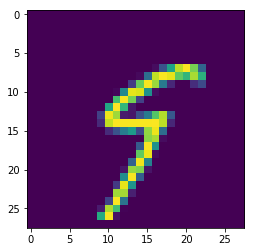

<Response [200]>
{
  "meta": {
    "puid": "vlg7fe3uuici70qkunt19aee8g",
    "tags": {},
    "routing": {
      "mnist-svm-1-0": -1
    }
  },
  "data": {
    "names": [],
    "ndarray": [
      {
        "id": "1",
        "values": 5.0
      }
    ]
  }
}


In [15]:
test_index = randint(0, test_data.shape[0]-1)
plt.imshow(test_data[test_index].reshape((28,28))); plt.show()
test_samples = test_data[test_index].reshape((1,784)).tolist()
test_samples_with_ids = [{'id': '1', 'values':sample} for sample in test_samples]

request = {"data":{"ndarray":test_samples_with_ids}}

predictions = rest_request("mnist-svm-1-0",request)

print(json.dumps(predictions, indent=2))
